In [1]:

import pandas as pd
import numpy as np

In [2]:
march_dev_df = pd.read_csv(r'C:\Users\user\Desktop\March_Madness\DEV_March_Madness.csv')

In [3]:
march_dev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Columns: 151 entries, Season to Post-Season Tournament Sorting Index
dtypes: float64(71), int64(73), object(7)
memory usage: 427.2+ KB


In [4]:
march_dev_df.describe()

,Season,Off.eFG %,Off.eFG % Rank,Off.TO %,Off.TO % Rank,Off.OR %,Off.OR % Rank,Off.FT Rate,Off.FT Rate Rank,Def.eFG %,...,Raw Offensive Efficiency,Raw Offensive Efficiency Rank,Adjusted Defensive Efficiency,Adjusted Defensive Efficiency Rank,Raw Defensive Efficiency,Raw Defensive Efficiency Rank,Active Coaching Length Index,Net Rating,Net Rating Rank,Post-Season Tournament Sorting Index
count,362.0,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,...,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,2024.0,50.403477,181.497238,17.156930,181.500000,28.890469,181.497238,32.981456,181.494475,50.506171,...,105.004144,181.500000,106.104972,181.500000,105.259116,181.500000,5.983425,-0.000829,181.234807,3.875691
std,0.0,3.058721,104.642757,2.032579,104.644637,4.056441,104.647310,4.751904,104.644266,2.401518,...,6.508342,104.644637,5.958483,104.644637,5.047419,104.644637,5.555038,11.952326,104.636464,1.653843
min,2024.0,41.011236,1.000000,12.001324,1.000000,17.047619,1.000000,21.419903,1.000000,43.638743,...,83.300000,1.000000,87.100000,1.000000,88.300000,1.000000,1.000000,-31.300000,1.000000,1.000000
25%,2024.0,48.301763,91.250000,15.781653,91.250000,26.207573,91.250000,29.474786,91.250000,49.000978,...,100.625000,91.250000,101.400000,91.250000,101.825000,91.250000,2.000000,-8.100000,91.250000,2.000000
50%,2024.0,50.588130,181.500000,17.061629,181.500000,28.677211,181.500000,32.729418,181.500000,50.419173,...,105.150000,181.500000,106.650000,181.500000,105.000000,181.500000,5.000000,-1.950000,181.000000,5.000000
75%,2024.0,52.174916,271.750000,18.281236,271.750000,31.711535,271.750000,36.109359,271.750000,52.143206,...,109.675000,271.750000,110.900000,271.750000,109.075000,271.750000,8.000000,8.700000,271.750000,5.000000
max,2024.0,59.858416,362.000000,24.009167,362.000000,41.958542,362.000000,49.968133,362.000000,58.203593,...,122.700000,362.000000,120.400000,362.000000,119.400000,362.000000,39.000000,32.200000,362.000000,5.000000


In [6]:
march_dev_df.isnull().sum()

Season                                  0
Off.eFG %                               0
Off.eFG % Rank                          0
Off.TO %                                0
Off.TO % Rank                           0
                                       ..
Net Rating Rank                         0
Seed                                    0
Region                                  0
Post-Season Tournament                  0
Post-Season Tournament Sorting Index    0
Length: 151, dtype: int64

In [8]:
# Data Cleaning

# Check for missing values
missing_values = march_dev_df.isnull().sum()

# Checking data types and converting if necessary. Focusing primarily on categorical data that might be incorrectly typed.
march_dev_df['Season'] = march_dev_df['Season'].astype(str)  # Ensuring Season is treated as categorical

# Summarize missing values and data types that might need conversion
missing_values[missing_values > 0], march_dev_df.dtypes


(DFP    362
 dtype: int64,
 Season                                   object
 Off.eFG %                               float64
 Off.eFG % Rank                            int64
 Off.TO %                                float64
 Off.TO % Rank                             int64
                                          ...   
 Net Rating Rank                           int64
 Seed                                     object
 Region                                   object
 Post-Season Tournament                   object
 Post-Season Tournament Sorting Index      int64
 Length: 151, dtype: object)

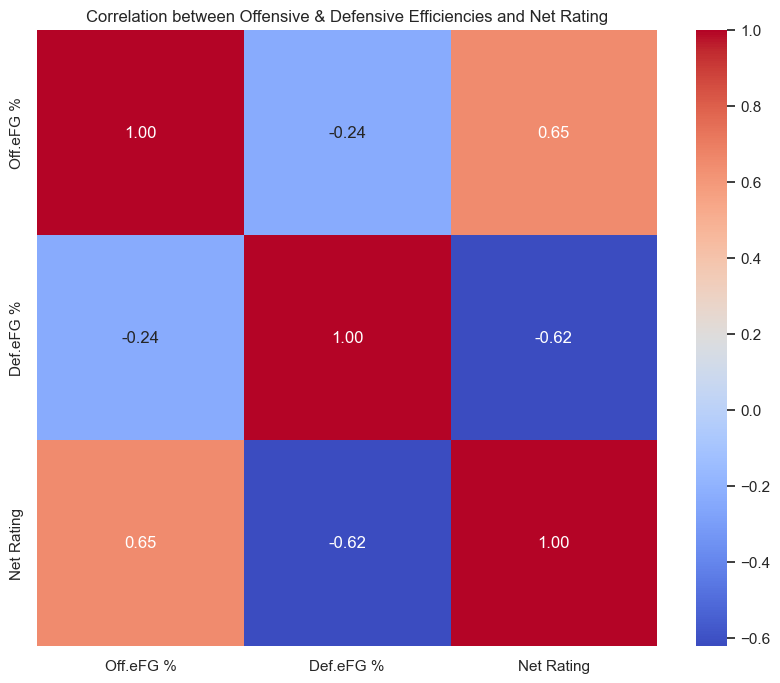

In [10]:
# Remove the 'DFP' column as it's entirely missing
data_cleaned = march_dev_df.drop(columns=['DFP'])

# Proceed with visualizations
# We'll prepare for several visualizations to explore the questions outlined

import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualization environment
sns.set(style="whitegrid")

# Prepare data for the visualizations
# For simplicity and effectiveness, we'll focus on key variables for our initial questions

# Visualization 1: Correlation Heatmap for Efficiencies and Net Rating
corr_columns = ['Off.eFG %', 'Def.eFG %', 'Net Rating']
corr_data = data_cleaned[corr_columns].corr()

# Visualization 2: Distribution of Net Ratings
net_rating_data = data_cleaned['Net Rating']

# Visualization 3: Team Performance by Conference (using Net Rating as a measure)
# We'll use a boxplot for this visualization

# Visualization 4: Relationship between Seed and Net Rating
# For this, ensure Seed is numeric for correlation analysis
data_cleaned['Seed'] = pd.to_numeric(data_cleaned['Seed'], errors='coerce')  # Convert Seed to numeric, errors as NaN

# Starting with Visualization 1: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Offensive & Defensive Efficiencies and Net Rating')
plt.show()


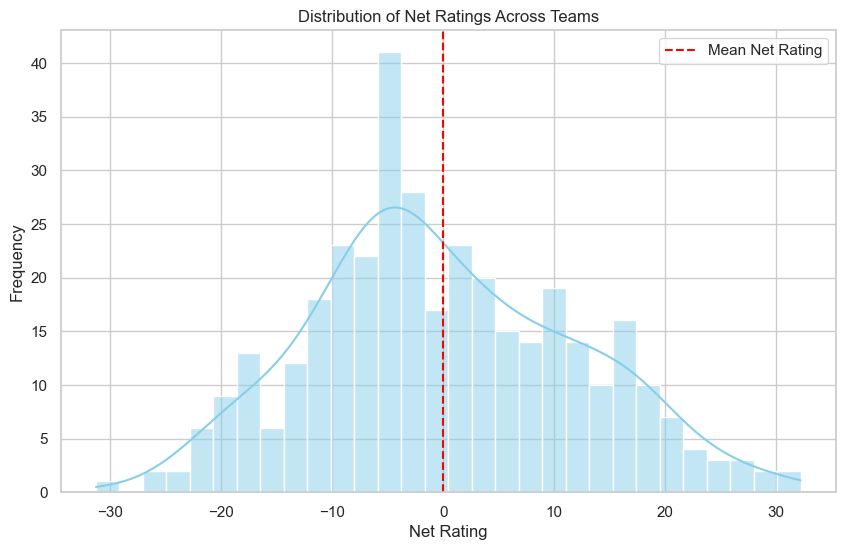

In [11]:
# Visualization 2: Distribution of Net Ratings
plt.figure(figsize=(10, 6))
sns.histplot(net_rating_data, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Net Ratings Across Teams')
plt.xlabel('Net Rating')
plt.ylabel('Frequency')
plt.axvline(net_rating_data.mean(), color='red', linestyle='--', label='Mean Net Rating')
plt.legend()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_22932\2013257465.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Net Rating', y='Conference', data=data_cleaned, palette='coolwarm')


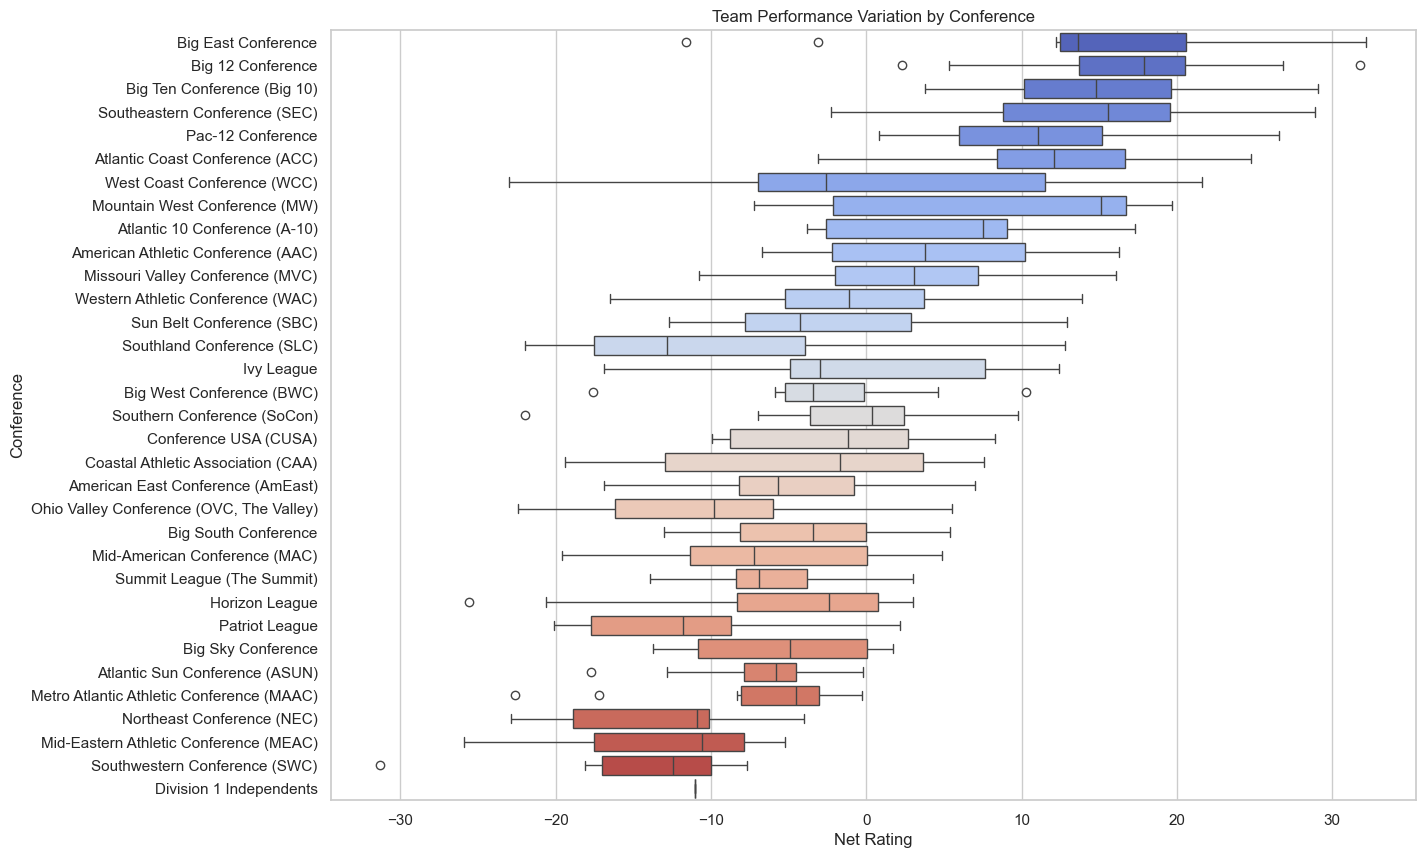

In [12]:
# Visualization 3: Team Performance by Conference
plt.figure(figsize=(14, 10))
sns.boxplot(x='Net Rating', y='Conference', data=data_cleaned, palette='coolwarm')
plt.title('Team Performance Variation by Conference')
plt.xlabel('Net Rating')
plt.ylabel('Conference')
plt.show()


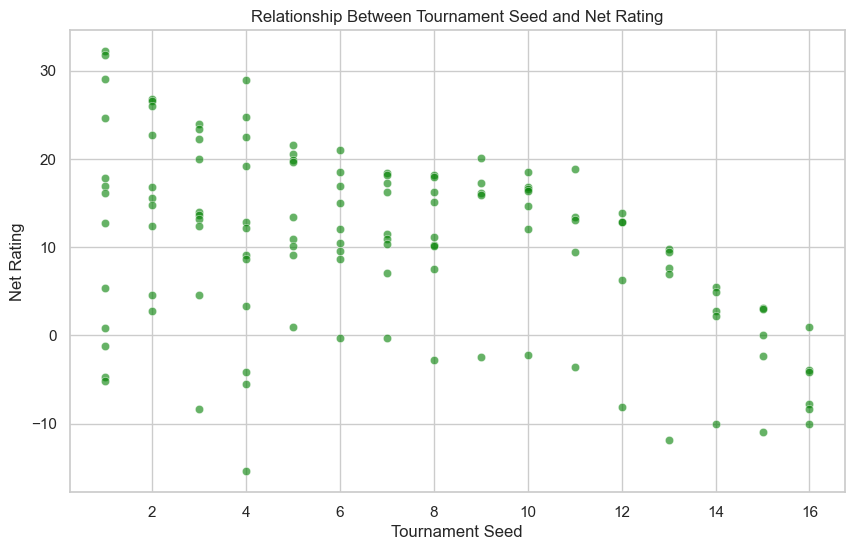

In [13]:
# Visualization 4: Relationship between Seed and Net Rating
# Dropping rows with NaN values in 'Seed' for this visualization
seed_net_rating_data = data_cleaned.dropna(subset=['Seed'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Seed', y='Net Rating', data=seed_net_rating_data, color='green', alpha=0.6)
plt.title('Relationship Between Tournament Seed and Net Rating')
plt.xlabel('Tournament Seed')
plt.ylabel('Net Rating')
plt.show()
